In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [146]:
#Read the cunsus_income file from the source and find the header right away
df=pd.read_csv("census_income1.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [147]:
#find colum names to identify numerical and catagorial values
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [148]:
#Drop race as native.country can be used to identify the origin
#Drop marital.status as it is no longer useful
#Drop relationship as it is no longer helpful for construction of valid conclusions
#Drop education column since education.num is already available to identify level of education from lower to higher


df.drop(columns=['race','marital.status','relationship','education'],inplace=True)
df.head()

,age,workclass,fnlwgt,education.num,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,9,?,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,?,186061,10,?,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Prof-specialty,Female,0,3900,40,United-States,<=50K


In [149]:
#Ckeck for missing values

check_missing=df.isnull().sum()*100/df.shape[0]

In [150]:
# Sorting the values in ascending order
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

In [151]:
#Checkout for unique values on object data type

df.select_dtypes(include='object').nunique()

# We found 6 catagorial elements which needs to be simplified for further process

workclass          9
occupation        15
sex                2
native.country    42
income             2
dtype: int64

Catagorize Occupation Titles

In [152]:
# Find subsets of occupation
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [153]:
# Write a function to simplify occupations and restrict them into minimal categories 
def seg_occupation(occupation):
    administrative_occupation=['Exec-managerial','Adm-clerical']
    technical_occupation=['Machine-op-inspct','Craft-repair','Transport-moving','Handlers-cleaners','Farming-fishing',
                    'Priv-house-serv']
    professional_occupation=['Tech-support','Prof-specialty','Armed-Forces']
    other_occupation=['Protective-serv','Sales']
    
    if occupation in administrative_occupation:
        return 'Administrators'
    elif occupation in technical_occupation:
        return 'Technicians'
    elif occupation in professional_occupation:
        return 'Professionals'
    elif occupation in other_occupation:
        return 'Others'
    else:
        return 'Unknown'

In [154]:
# Apply the function of occupation with newly changed seg_occupations
df['occupation']=df['occupation'].apply(seg_occupation)

<AxesSubplot:>

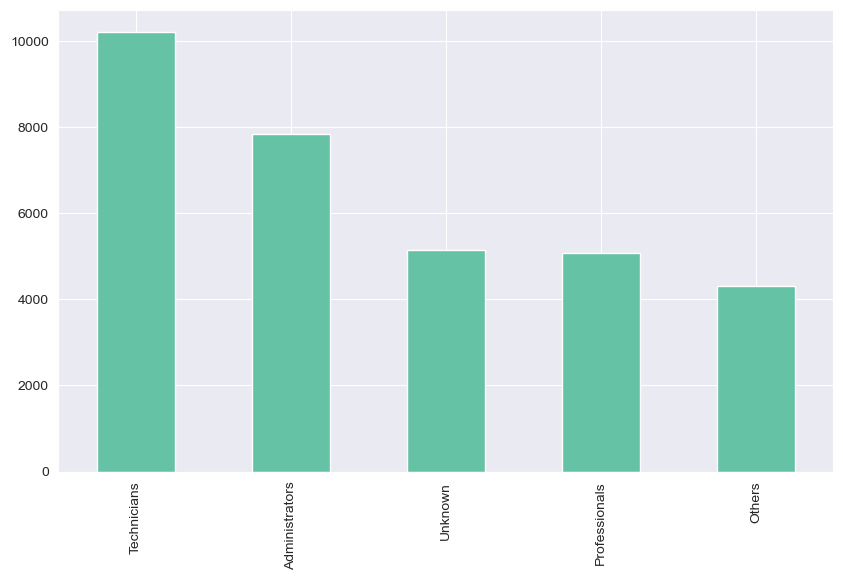

In [155]:
# Plot the bar chart to project the columns 
plt.figure(figsize=(10,6))
df['occupation'].value_counts().plot(kind='bar')

Categorise the Employee Native Country

In [156]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [157]:
# Write a function to categorise the regions in to continents
def catagorise_region(country):
    if country in['United-States','Mexico','Canada','Outlying-US(Guam-USVI-etc)']:
        return 'North America'
    elif country in['Greece','Holand-Netherlands','Puerto-Rico','Poland','England','Germany','Italy','Ireland','Hungary',
                 'France','Yugoslavia','Scotland','Portugal','Laos']:
        return 'Europe'
    elif country in['Vietnam','China','Taiwan','India','Philippines','Iran','Japan','South','Hong','Cambodia','Thailand']:
        return 'Asia'
    elif country in['Trinadad&Tobago','Honduras','Cuba','Peru','Nicaragua','Dominican-Republic','Haiti','El-Salvador',
                    'Guatemala',
                   'Jamaica','Ecuador']:
        return 'South America'
    else:
        return 'Unknown'

In [158]:
#Apply this function to the native.country column to update the new locations
df['native.country']=df['native.country'].apply(catagorise_region)

<AxesSubplot:>

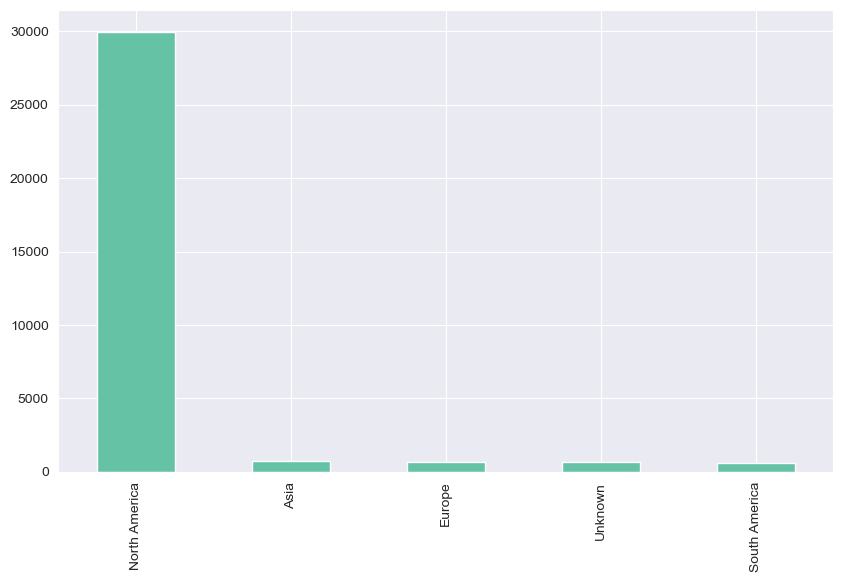

In [159]:
# Plot the bar chart to project the columns 
plt.figure(figsize=(10,6))
df['native.country'].value_counts().plot(kind='bar')

In [160]:

df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [161]:
#Write a function to categorise workclass
def work_category(workclass):
    if workclass in['Private']:
        return 'Private Job'
    elif workclass in['State-gov','Federal-gov','Local-gov']:
        return 'Govt Job'
    elif workclass in['Self-emp-not-inc','Self-emp-inc','Without-pay']:
        return 'Self Employment'
    else:
        return 'Unknown'

In [162]:
# Apply new work category to work class
df['workclass']=df['workclass'].apply(work_category)

<AxesSubplot:>

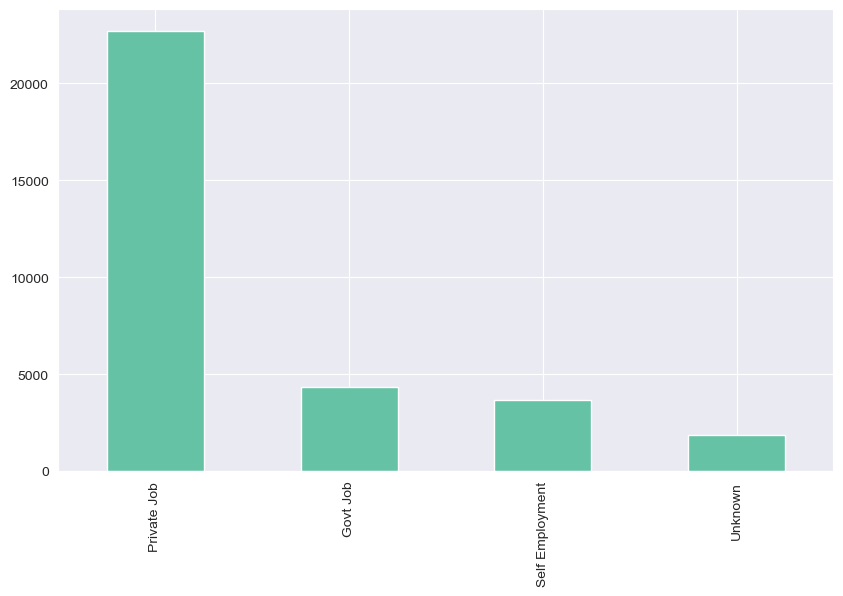

In [163]:
# Plot the bar chart to project the columns 
plt.figure(figsize=(10,6))
df['workclass'].value_counts().plot(kind='bar')

In [164]:
df['income']=df['income'].astype(str)

In [165]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [166]:
df['income']=df['income'].map({'<=50K':50000,'>50K':100000})

In [167]:
# Check no of unique values of object datatype

df.select_dtypes(include='object').nunique()

workclass         4
occupation        5
sex               2
native.country    5
dtype: int64

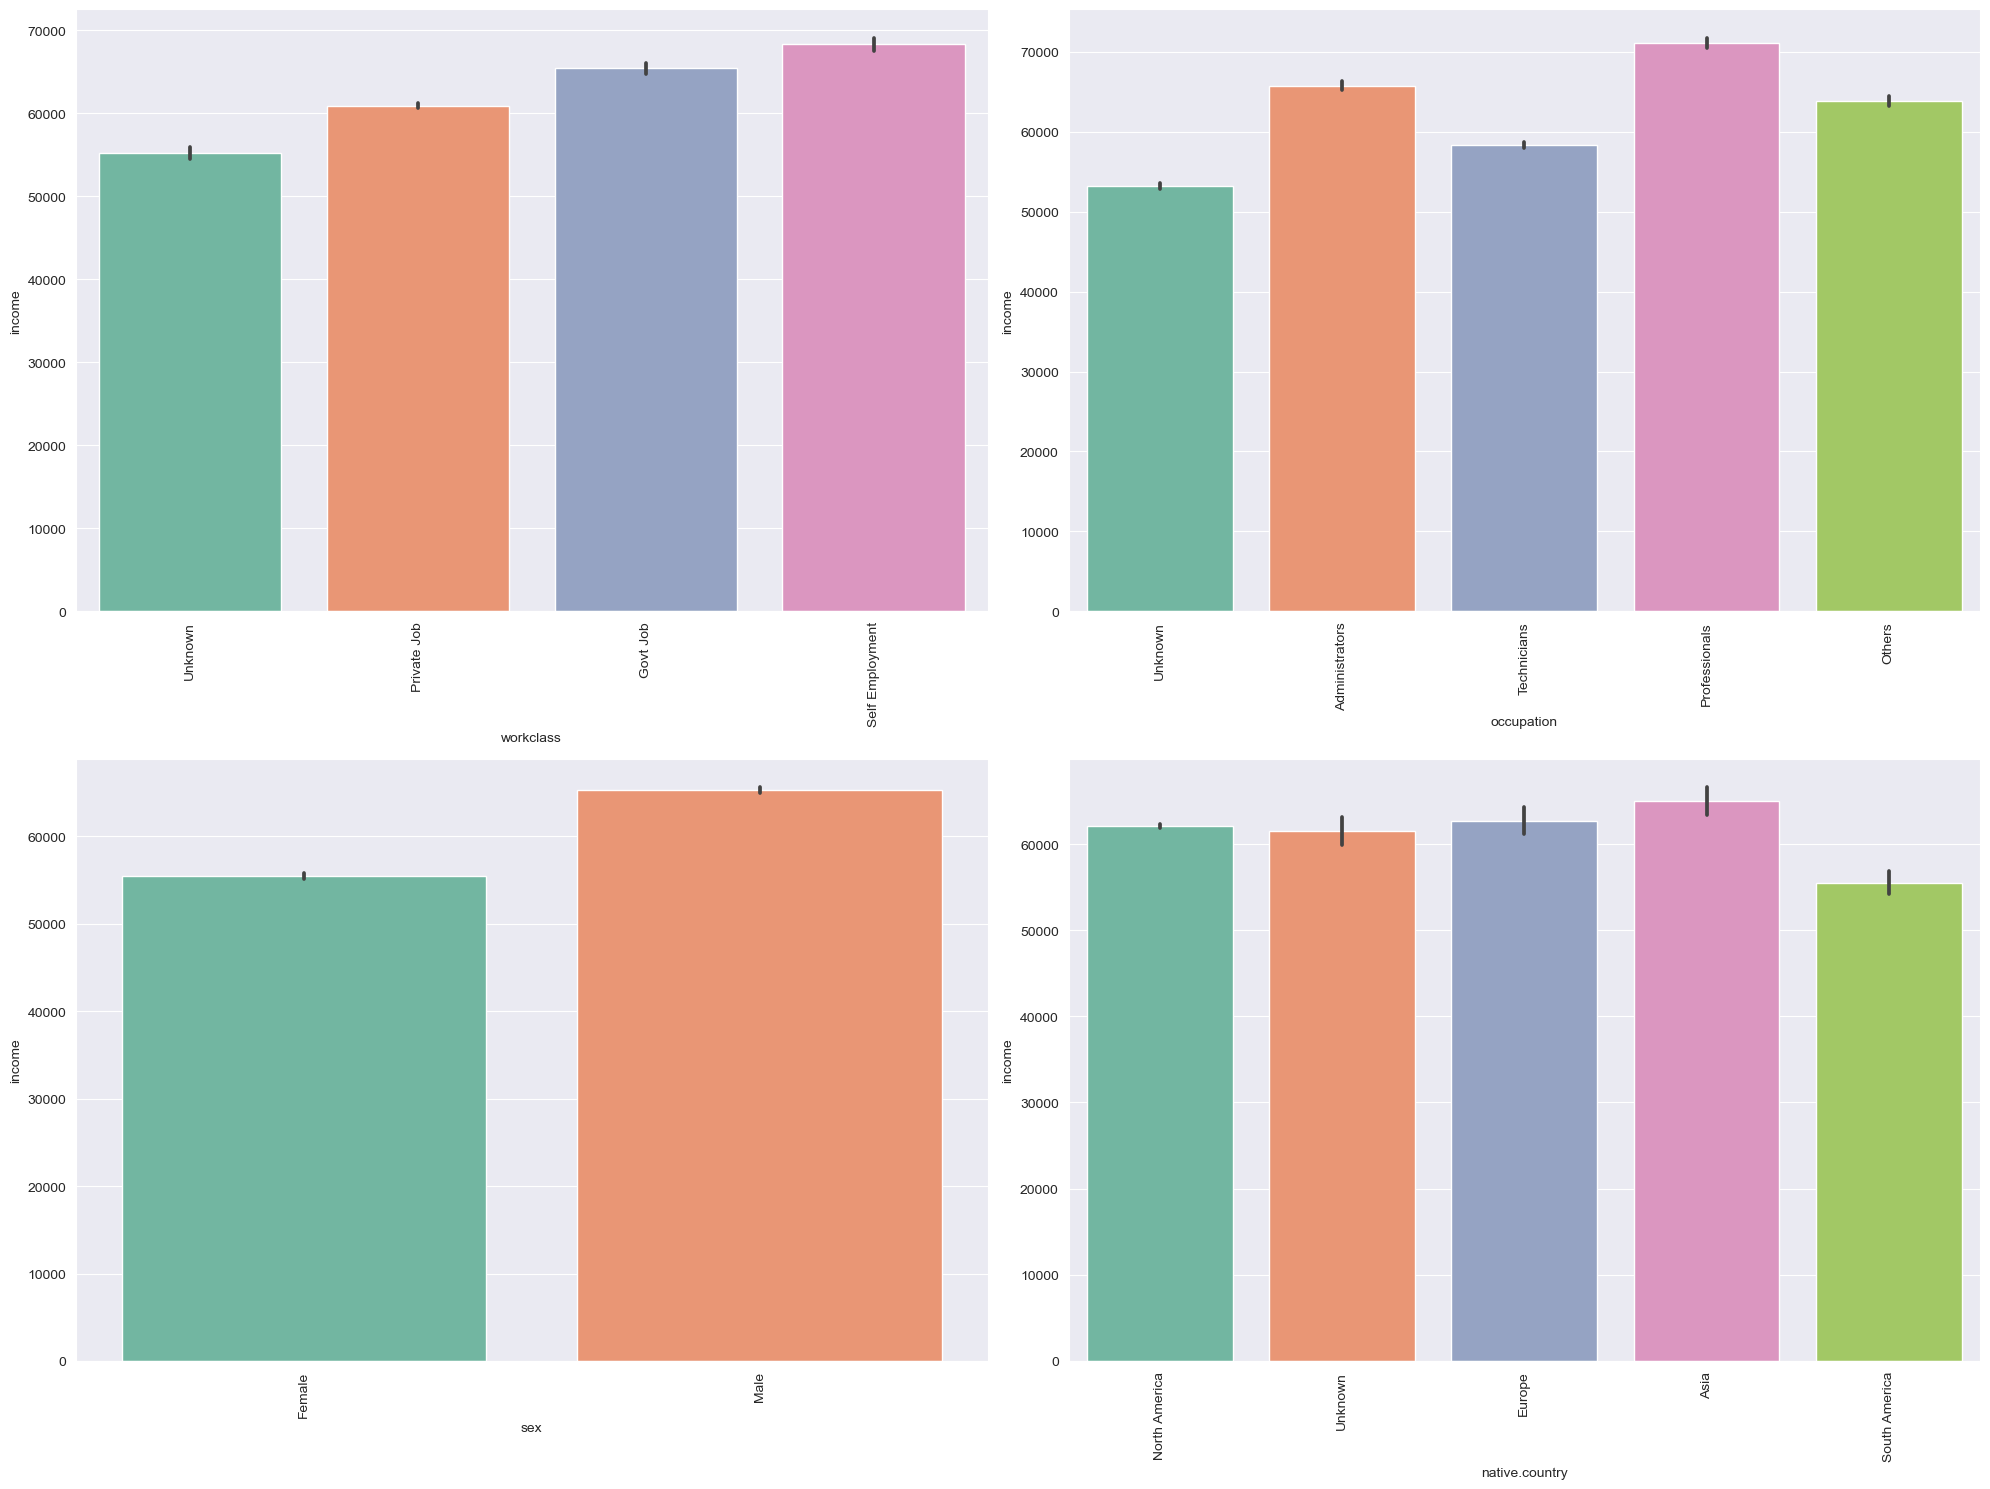

In [168]:
#list of catagorial variables to plot

cat_var=['workclass','occupation','sex','native.country']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axs=axs.flatten()

#Create barplot for each catagorial variable

for i, var in enumerate(cat_var):
    sns.barplot(x=var,y='income',data=df,ax=axs[i],estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
#Adjust spacing between subplots

fig.tight_layout()

#Show Plot
plt.show()

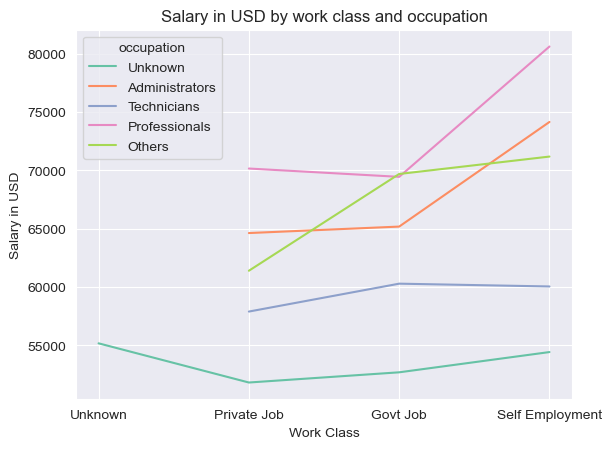

In [169]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(x='workclass',y='income',hue='occupation',data=df,ci=None)

plt.title('Salary in USD by work class and occupation')
plt.xlabel('Work Class')
plt.ylabel('Salary in USD')

plt.show()

LABEL ENCODING FOR OBJECT DATATYPE

In [170]:
#Loop over each column in DataFrame where datatype is object

for col in df.select_dtypes(include=['object']).columns:

    #Print the column name and unique values
    
    print(f"{col}:{df[col].unique()}")

workclass:['Unknown' 'Private Job' 'Govt Job' 'Self Employment']
occupation:['Unknown' 'Administrators' 'Technicians' 'Professionals' 'Others']
sex:['Female' 'Male']
native.country:['North America' 'Unknown' 'Europe' 'Asia' 'South America']


In [171]:
from sklearn import preprocessing
#Loop over each column in DataFrame where datatype is object
for col in df.select_dtypes(include=['object']).columns:
#Initialize the label coder
    label_encoder=preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique value in the column
    label_encoder.fit(df[col].unique())
    
    #Transform the colum using encoder
    df[col]=label_encoder.transform(df[col])
    
    #Print the column name and unique encoded values
    
    print(f"{col}: {df[col].unique()}")

workclass: [3 1 0 2]
occupation: [4 0 3 2 1]
sex: [0 1]
native.country: [2 4 1 0 3]


In [172]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education.num     int64
occupation        int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int64
dtype: object

ALL THE DATA IS CATAGORIAL SO THAT MEANS THERE ARE NO OUTLIERS

<AxesSubplot:>

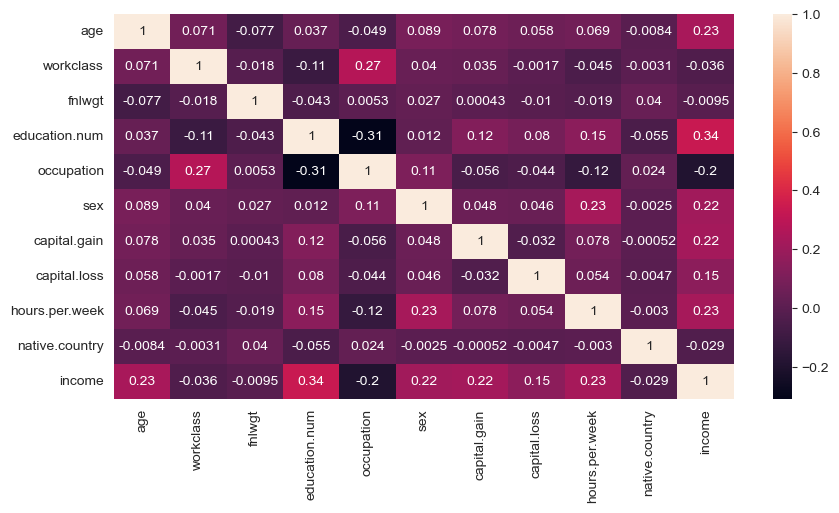

In [173]:
# CORELATION HEATMAP
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

TRAIN TEST SPLITS

In [174]:
X=df.drop('income',axis=1)
y=df['income']

In [175]:
#Test Size 20% and Train Size 80%

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

LOGISTIC REGRESSOR

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Create a Logostic Regression Model

logreg=LogisticRegression(solver='liblinear',max_iter=10000)

#Define the parameter grid

param_grid={
    'penalty':['l1','l2'],
    'C':[0.01,0.1,1,10]
    
}

#Perform a gridsearch with cross-validation to find best hyperparameters

grid_search=GridSearchCV(logreg,param_grid,cv=5)
grid_search.fit(X_train,y_train)

# print the best hyperparameters

print(grid_search.best_params_)

{'C': 10, 'penalty': 'l1'}


In [177]:
from sklearn.ensemble import RandomForestClassifier
logreg=LogisticRegression(solver='liblinear',max_iter=10000,C=1,penalty='l1')
logreg.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')

In [178]:
#finding and printing Accuracy Score

y_pred=logreg.predict(X_test)

print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 82.57 %


In [179]:
# Printing All Test Scores
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss
print('F-1 Score',(f1_score(y_test,y_pred,average='micro')))
print('Precision Score:',(precision_score(y_test,y_pred,average='micro')))
print('Recall Score:',(recall_score(y_test,y_pred,average='micro')))
print('Jaccard Score:',(jaccard_score(y_test,y_pred,average='micro')))
print('Log Loss:',(log_loss(y_test,y_pred)))


F-1 Score 0.8257331490864425
Precision Score: 0.8257331490864425
Recall Score: 0.8257331490864425
Jaccard Score: 0.7031903765690377
Log Loss: 27.482386416452595


CONFUSION MATRIX IS CORRECT ACCORDING TO THE GIVEN PROBLEM STATEMENT  

Text(0.5, 1.0, 'Accuracy Score for Logistic Rgression:0.8257331490864425')

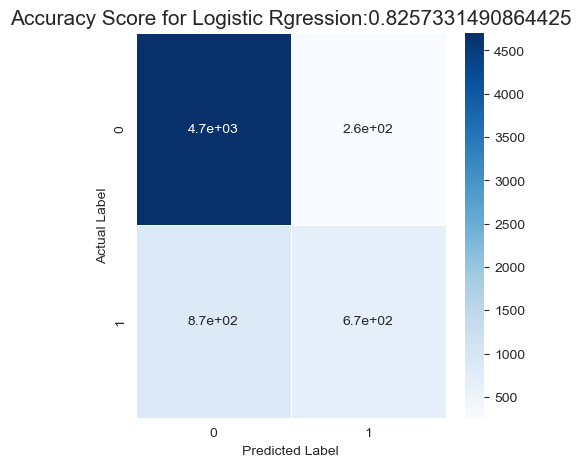

In [180]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title=('Accuracy Score for Logistic Rgression:{0}'.format(logreg.score(X_test,y_test)))
plt.title(all_sample_title,size=15)